# 행정안전부 공공데이터(행정안전부_상습 결빙구간)
https://www.data.go.kr/data/15067396/fileData.do

### pandas 모듈로 표 읽기

In [1]:
import pandas as pd

# CSV 파일 경로 (간단한 경로 사용)
file_path = r'C:/Users/sunny/Desktop/graduation/haengjeonganjeonbu_sangseub-gyeolbinggugan_20231222.csv/haengjeonganjeonbu_sangseub-gyeolbinggugan_20231222.csv'

### 출력 제한 해제
#### 이거 없으면 중간 데이터들 생략되어 표시됨 

In [2]:
pd.set_option('display.max_rows', None)  # 모든 행 출력
pd.set_option('display.max_columns', None)  # 모든 열 출력

## csv파일 읽기
파일 경로 앞에 r 붙이기
파일 경로 파일 탐색기에서 복사해오면 '\'를 '/'로 바꿔줘야 함
파일경로 복사해서 붙인 뒤 '/파일명' 붙이기

In [3]:
# 파일 읽기 (euc-kr 인코딩 사용)
try:
    data = pd.read_csv(file_path, encoding='euc-kr')  # euc-kr은 한국어 데이터에 자주 사용됩니다.
except UnicodeDecodeError:
    # 만약 euc-kr이 실패하면 utf-8로 시도
    data = pd.read_csv(file_path, encoding='utf-8')

### 데이터 확인

In [4]:
print(data)

          구간 번호                    관리청   도로 분류             대표지역  \
0       47720-2             대구광역시(군위군)      군도         경상북도 군위군   
1       47720-5             대구광역시(군위군)      군도         경상북도 군위군   
2       26380-3             부산광역시(사하구)     지방도        부산광역시 사하구   
3      48000-33     경상남도(도로관리사업소 진주지소)     지방도         경상남도 사천시   
4      48000-39     경상남도(도로관리사업소 진주지소)     지방도         경상남도 사천시   
5       46720-2              전라남도(곡성군)      군도         전라남도 곡성군   
6       46720-1              전라남도(곡성군)     지방도         전라남도 곡성군   
7       41500-2               경기도(이천시)     국지도          경기도 이천시   
8      26260-16             부산광역시(동래구)     지방도        부산광역시 동래구   
9      48000-40     경상남도(도로관리사업소 진주지소)     지방도         경상남도 사천시   
10      50000-8            제주특별자치도(본청)     지방도      제주특별자치도 제주시   
11     50000-11            제주특별자치도(본청)     지방도      제주특별자치도 제주시   
12      26260-4             부산광역시(동래구)     지방도        부산광역시 동래구   
13      26260-1             부산광역시(동래구)     지방도        부산광역시 동래

### 데이터를 새로운 CSV 파일로 저장

In [5]:
#data.to_csv('전체데이터.csv', index=False, encoding='utf-8-sig')  # utf-8-sig는 Excel 호환

### 데이터프레임의 기본 정보 확인
### 컬럼별 결측값 확인

In [6]:
# 데이터프레임의 기본 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2957 entries, 0 to 2956
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   구간 번호                       2957 non-null   object 
 1   관리청                         2956 non-null   object 
 2   도로 분류                       2957 non-null   object 
 3   대표지역                        2956 non-null   object 
 4   도로(노선)명                     2957 non-null   object 
 5   총길이(km)                     2956 non-null   float64
 6   기점 위도(WGS84(4326))          2957 non-null   float64
 7   기점 경도(WGS84(4326))          2957 non-null   float64
 8   종점 위도(WGS84(4326))          2956 non-null   float64
 9   종점 경도(WGS84(4326))          2956 non-null   float64
 10  정북기준 도로방향 각도(x1)            2957 non-null   float64
 11  정북기준 도로방향 각도(y1)            2957 non-null   float64
 12  정북기준 도로방향 각도(기점 기준십진수 방위각)  2940 non-null   float64
dtypes: float64(8), object(5)
memory u

### 컬럼별 결측값 확인

In [7]:
print(data.isnull().sum())

구간 번호                          0
관리청                            1
도로 분류                          0
대표지역                           1
도로(노선)명                        0
총길이(km)                        1
기점 위도(WGS84(4326))             0
기점 경도(WGS84(4326))             0
종점 위도(WGS84(4326))             1
종점 경도(WGS84(4326))             1
정북기준 도로방향 각도(x1)               0
정북기준 도로방향 각도(y1)               0
정북기준 도로방향 각도(기점 기준십진수 방위각)    17
dtype: int64


### 도로 길이 통계 요약

In [8]:
print(data['총길이(km)'].describe())

count    2956.000000
mean        7.833836
std       186.811021
min         0.010000
25%         0.557500
50%         1.000000
75%         2.000000
max      9280.000000
Name: 총길이(km), dtype: float64


### 도로 길이 히스토그램 그리기

### + 한글 폰트 설정

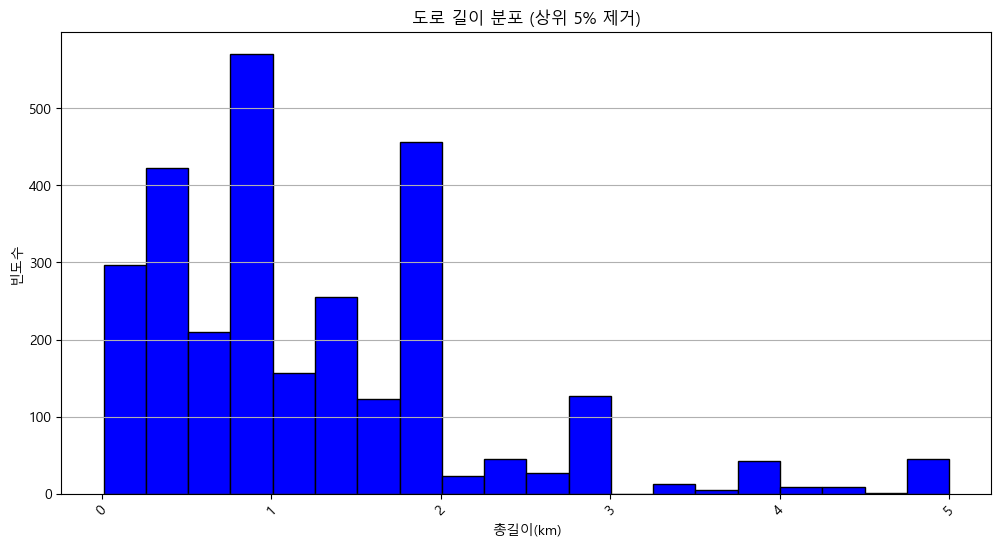

In [9]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows의 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows: 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 이상치 제거 (상위 95% 값 기준)
upper_limit = data['총길이(km)'].quantile(0.95)  # 상위 95% 값 계산
filtered_data = data[data['총길이(km)'] <= upper_limit]

# 히스토그램 다시 그리기
plt.figure(figsize=(12, 6))
plt.hist(filtered_data['총길이(km)'], bins=20, color='blue', edgecolor='black')
plt.title('도로 길이 분포 (상위 5% 제거)')
plt.xlabel('총길이(km)')
plt.ylabel('빈도수')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### 도로 분류별 데이터 개수 확인

In [10]:
road_type_counts = data['도로 분류'].value_counts()
print(road_type_counts)

도로 분류
지방도       1187
시도         373
군도         356
일반국도       354
고속국도       208
농어촌도로      114
도시계획도로     104
위임국도        82
구도          77
국지도         68
광역시도        28
구국도          6
Name: count, dtype: int64


### 도로 분류별 평균 길이 계산

In [11]:
road_type_avg_length = data.groupby('도로 분류')['총길이(km)'].mean()
print(road_type_avg_length)

도로 분류
고속국도       1.910385
광역시도      84.531071
구국도        2.300000
구도         0.430000
국지도       12.364559
군도         3.667556
농어촌도로      1.463509
도시계획도로     0.399423
시도        40.352823
위임국도       1.760610
일반국도       3.197881
지방도        1.434869
Name: 총길이(km), dtype: float64


In [13]:
!jupyter nbconvert --to markdown notebook.ipynb

This application is used to convert notebook files (*.ipynb)

[NbConvertApp] WARNING | pattern 'notebook.ipynb' matched no files



        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePreprocessor.enabled=True]
--allow-errors
    Continue noteboo